In [48]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn import metrics as mt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
sns.set_palette("husl")


In [8]:
eopen=pd.read_csv('Data\email_opened_table.csv')
click=pd.read_csv('Data\link_clicked_table.csv')
email=pd.read_csv('Data\email_table.csv')

In [16]:
click['Clicked'] = 1
eopen['Opened'] = 1

* What percentage of users opened the email?
* what percentage clicked on the link within the email?

In [46]:
merged = email.merge(click, how='outer')
df = eopen.merge(merged, how='outer')
df = df.fillna(0)

In [44]:
print("Percentage of users opened the email {}%".format(df['Opened'].sum()*100/len(df)))
print("Percentage of clicked on the link within the email {}%".format(df['Clicked'].sum()*100/len(df)))

Percentage of users opened the email 10.345%
Percentage of clicked on the link within the email 2.119%


Q. The VP of marketing thinks that it is stupid to send emails to a random subset and in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future email campaigns to maximize the probability of users clicking on the link inside the email?

*Intuition*: The model requested would predict the column clicked and in turn opened. To understand the kind of model and feature to build, we need to perform EDA and preliminary Statistics analysis.


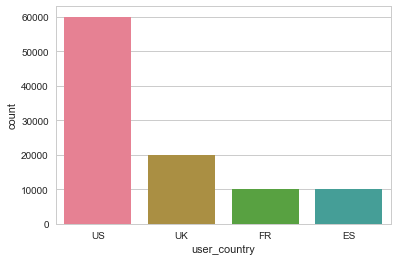

In [49]:
#Users according to country
sns.countplot(x="user_country", data=df)

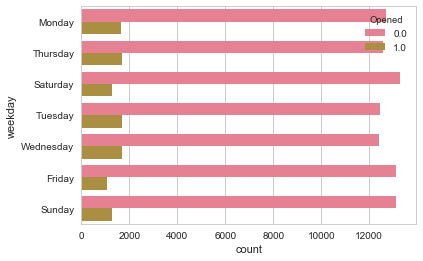

In [55]:
#Users according to weekday
sns.countplot(y="weekday",hue = "Opened", data=df)

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(11.7, 8.27)

sns.countplot(x="hour",hue = "Opened", data=df, ax = ax1)
sns.countplot(x="user",hue = "email_version", data=df, ax = ax2)
sns.countplot(x="hour",hue = "email_text", data=df, ax = ax3)


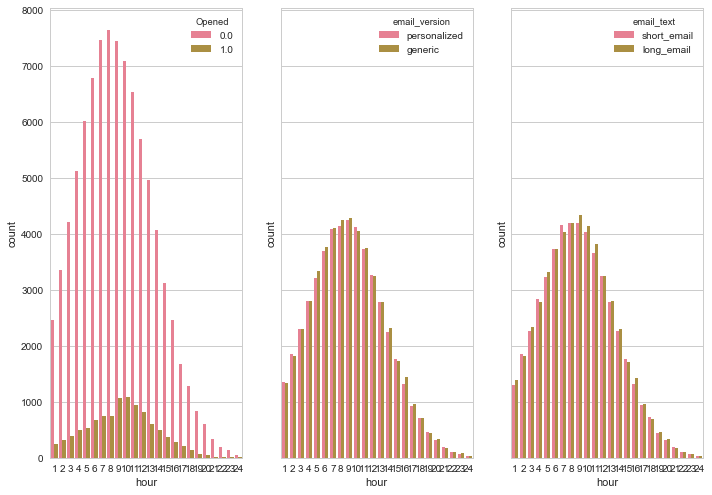

In [67]:
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_size_inches(11.7, 8.27)

sns.countplot(x="hour",hue = "Opened", data=df, ax = ax1)
sns.countplot(x="hour",hue = "email_version", data=df, ax = ax2)
sns.countplot(x="hour",hue = "email_text", data=df, ax = ax3)


#### Some Facts about data:
     - Total email ID's : 10,000
     - Number of Unique Countires : 4, Maximum users in US
     - No visual difference in distribution of emails opened 
     - same number of personalised/generic emails sent

In [50]:
df.head()

,email_id,Opened,email_text,email_version,hour,weekday,user_country,user_past_purchases,Clicked
0,284534,1.0,short_email,personalized,7,Monday,US,6,1.0
1,609056,1.0,short_email,personalized,2,Thursday,US,6,1.0
2,220820,1.0,short_email,personalized,8,Monday,UK,4,1.0
3,905936,1.0,short_email,generic,14,Saturday,UK,3,1.0
4,164034,1.0,long_email,personalized,2,Thursday,US,11,1.0
